In [1]:
%load_ext autoreload
%autoreload 2

- [Element Picker](#Element-Picker)
- [Gaussian Smoothing Picker](#Gaussian-Smoothing-Picker)
- [Von Mises](#Von-Mises-Stress-Condition)
- [Von Mises Result](#Von-Mises-Result)
- [Circle](#Circle-Stress-Condition)
- [Circle Result](#Circle-Result)

In [2]:
import struct_opt.material_opt as material_opt
import struct_opt.visual as visual
from struct_opt.environment_setup import get_element_index_matrix

import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt


Element Picker
---

elements are indexed in the following manner

| 1 | 5 | 9  | 13 |
|---|---|----|----|
| 2 | 6 | 10 | 14 |
| 3 | 7 | 11 | 15 |
| 4 | 8 | 12 | 16 |

visualize elements using function below

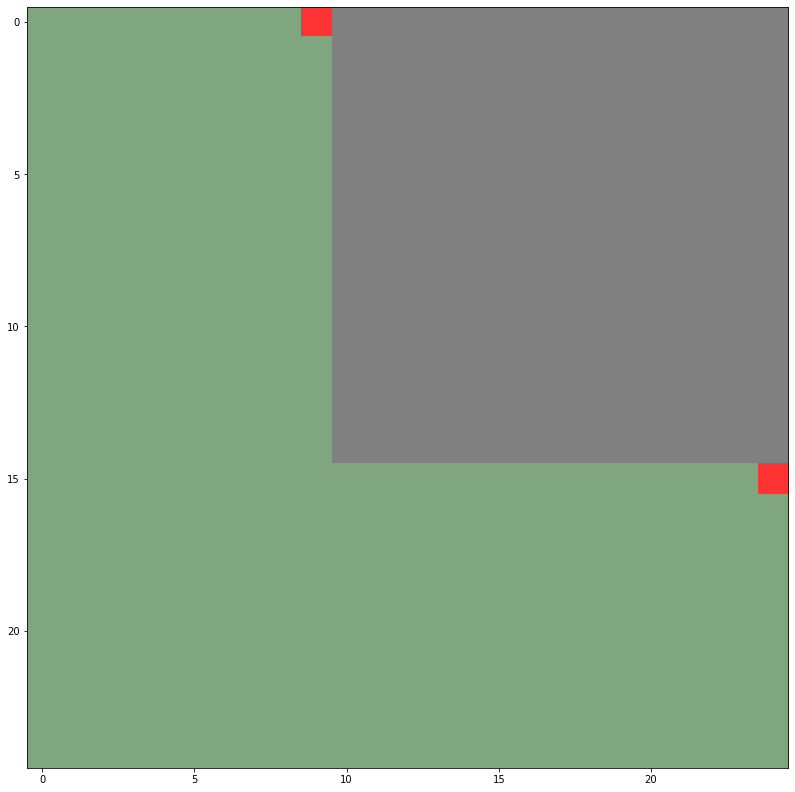

In [4]:
problem_size = 5

elements = [16 * np.square(problem_size) - problem_size * 2, 225]
element_index_matrix = get_element_index_matrix(problem_size)


visual.highlight_elements(element_index_matrix, elements)

Gaussian Smoothing Picker
---

Use this to check how the mass is spread out for different value of the variance and width of some element

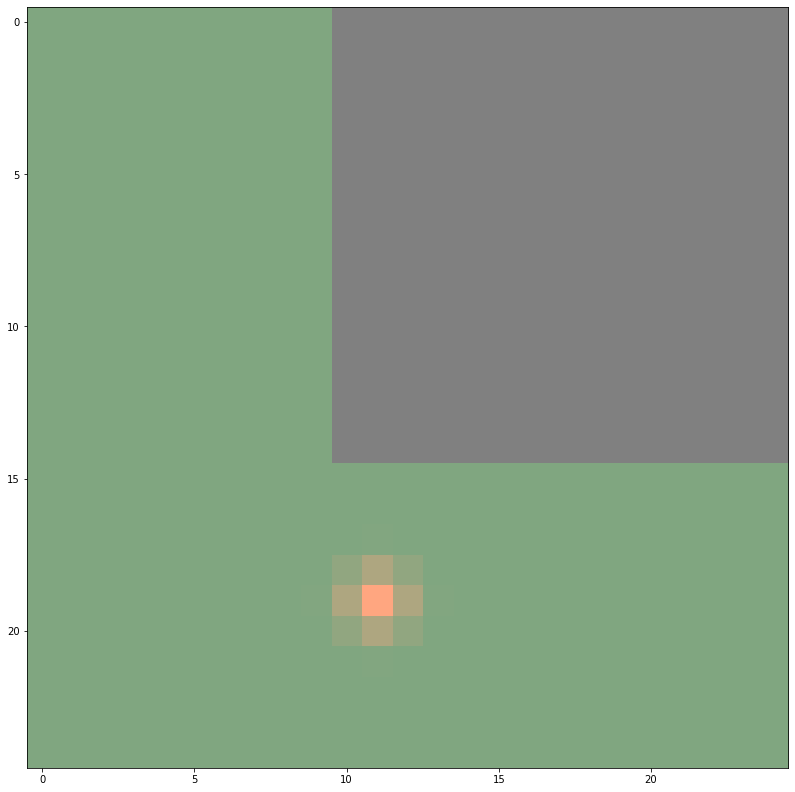

In [5]:
visual.highlight_gaussian_smoothing(element_index_matrix, element=264, variance=1.0, width=3.0)

Von Mises Stress Condition
---

In [25]:
problem_size = 5
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2
    ]),
    directions=np.array([
        1
    ]),
    amplitudes=np.array([
        -1
    ]),
    max_constraint=2600,
    
    mode="von mises",
    
    smoothing_mode="gaussian",
    smoothing_width=3.0,
    variance=0.5,
    
    penalty_mode="entropy",
    penalty_epochs=50, # Last x epochs uses penalty
    penalty_size=2.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=100,
    barrier_width=200,
    
    epochs=100,
    learning_rate=0.2,
    
    data_directory="data"
)


Initializing env: 0.008940935134887695 seconds
0: O: 240.27381695748915 W: 352.31883119115344 C 2293.3765865515034 -- T: 0.2778301239013672
1: O: 216.1125406105322 W: 347.4678639639783 C 2228.063396324599 -- T: 0.15979886054992676
2: O: 195.97879363892542 W: 340.97393464110223 C 2173.709262444018 -- T: 0.1726393699645996
3: O: 177.60216541229664 W: 332.935334063337 C 2127.2806497715937 -- T: 0.16184306144714355
4: O: 163.56822708353283 W: 323.3910100697349 C 2105.573741943477 -- T: 0.18010473251342773
5: O: 147.17036121272992 W: 313.48486241156456 C 2072.41266659601 -- T: 0.1616051197052002
6: O: 133.28940470480882 W: 302.6812896911544 C 2056.0654394048465 -- T: 0.16869020462036133
7: O: 138.5817186613928 W: 292.1428736342177 C 2135.641515114101 -- T: 0.16101455688476562
8: O: 138.4483701983124 W: 282.2692545912146 C 2178.936856899415 -- T: 0.1696183681488037
9: O: 147.9137610798799 W: 272.3343849300084 C 2252.9820790333606 -- T: 0.15833497047424316
10: O: 158.5724808256639 W: 262.6764

88: O: 207.46558705033297 W: 210.14852257943045 C 1929.7187947748052 -- T: 0.1681966781616211
89: O: 206.00615401892082 W: 210.43124172038125 C 1929.566919706269 -- T: 0.15844178199768066
90: O: 204.39056422062535 W: 210.64906030189255 C 1929.0996026193272 -- T: 0.17033743858337402
91: O: 202.63372122889598 W: 210.80853945122374 C 1928.3596052254086 -- T: 0.16205167770385742
92: O: 200.7842794552559 W: 210.91520986526973 C 1927.362857490049 -- T: 0.1757194995880127
93: O: 198.8725542412958 W: 210.98095618430565 C 1926.350122219624 -- T: 0.16298246383666992
94: O: 196.9194989754182 W: 211.0084945725708 C 1925.2588304513752 -- T: 0.19518303871154785
95: O: 196.17956292693887 W: 210.99682914626055 C 1932.4091898128358 -- T: 0.19292545318603516
96: O: 192.97248619555398 W: 211.02886283753236 C 1922.1561595567166 -- T: 0.1694951057434082
97: O: 191.0343112367735 W: 211.02805471619013 C 1920.3028645091763 -- T: 0.16847634315490723
98: O: 189.04776950484083 W: 211.0018041422633 C 1918.5142692

Von Mises Result
---

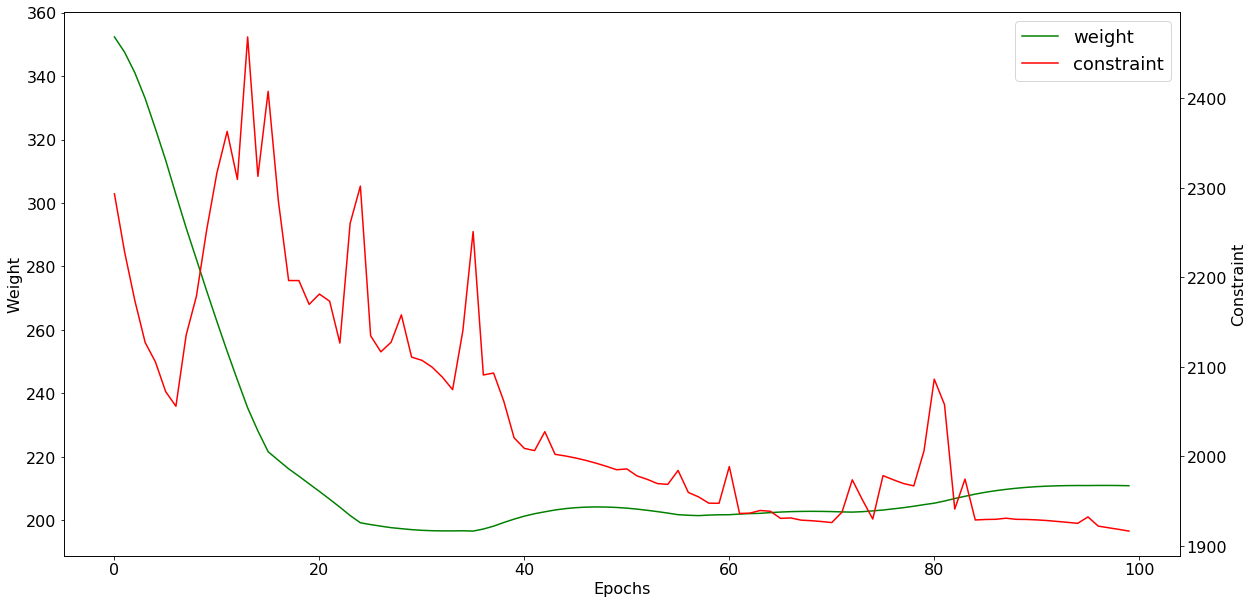

In [26]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

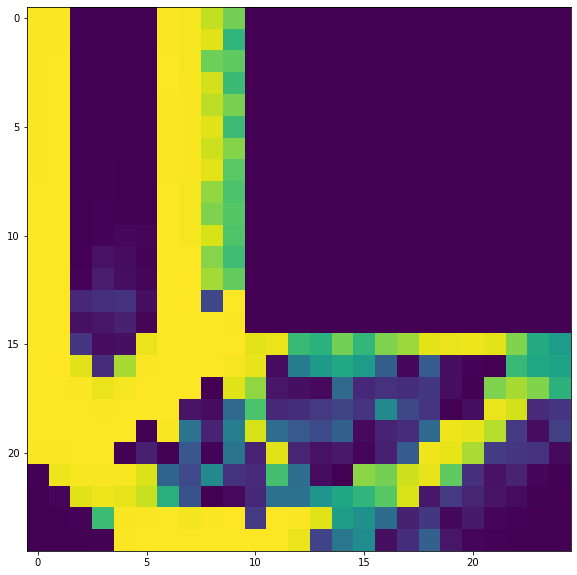

In [27]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())

Circle Stress Condition
---

In [17]:
problem_size = 10
material_opt.main(
    problem_size=problem_size,
    elements=np.array([
        16 * np.square(problem_size) - problem_size * 2, 225
    ]),
    directions=np.array([
        1,
        1
    ]),
    amplitudes=np.array([
        -1,
        -1
    ]),
    max_constraint=18000,
    
    mode="circle",
    smoothing_mode="gaussian",
    smoothing_width=3.0,
    variance=1.0,
    
    thickness=0.02,
    poisson_ratio=0.3,
    initial_value_design=2.0,
    elasticity_module=1000,
    
    barrier_size=100,
    barrier_width=2000,
    
    epochs=150,
    learning_rate=0.1,
    
    phis=[0.0, 0.5],
    kf=0.3,
    
    data_directory="data"
)


Initializing env: 0.05580019950866699 seconds
0: O: 1125.3024583359079 W: 1409.275324764612 C 16288.88779512984 -- T: 1.1364994049072266
1: O: 1111.506458184029 W: 1397.9195245323945 C 16246.619619879946 -- T: 0.8276684284210205
2: O: 1097.3908975694521 W: 1384.808172858047 C 16228.923312107148 -- T: 0.8488965034484863
3: O: 1082.85414769784 W: 1370.1258066622977 C 16231.500412083209 -- T: 0.8298990726470947
4: O: 1067.8489742730223 W: 1353.9488488216316 C 16252.10247304403 -- T: 0.8338227272033691
5: O: 1052.3694104759331 W: 1336.318602705555 C 16289.292839292368 -- T: 0.854517936706543
6: O: 1036.4445962076916 W: 1317.3468932426954 C 16340.630223857228 -- T: 0.8307645320892334
7: O: 1020.1227420292563 W: 1297.275383505293 C 16401.698789488917 -- T: 0.8347511291503906
8: O: 1003.4571358301575 W: 1276.3072336545592 C 16469.008009291607 -- T: 0.833812952041626
9: O: 986.5327518723407 W: 1254.4616474618917 C 16542.527366260154 -- T: 0.8547415733337402
10: O: 969.470717887989 W: 1231.8005

90: O: 533.8176740939583 W: 786.4992481363028 C 16748.640390977067 -- T: 0.8799712657928467
91: O: 532.770434479165 W: 786.315118818354 C 16737.793032348367 -- T: 0.8640968799591064
92: O: 532.3053648993873 W: 786.2054472720632 C 16733.299566088026 -- T: 0.8610336780548096
93: O: 531.4256369528772 W: 786.2312740036216 C 16721.827731071528 -- T: 0.840867280960083
94: O: 531.4471682557436 W: 786.4448908703753 C 16719.56036414539 -- T: 0.8402724266052246
95: O: 532.1206873348151 W: 786.6209895552398 C 16725.834059200573 -- T: 0.8648717403411865
96: O: 532.408690210678 W: 786.7817871413667 C 16727.445712380875 -- T: 0.866602897644043
97: O: 532.346218003867 W: 786.9289841390437 C 16724.828317081643 -- T: 0.8499293327331543
98: O: 531.9719726977048 W: 787.0469748547415 C 16718.60693240045 -- T: 0.8652913570404053
99: O: 531.3593067730151 W: 787.1073831708503 C 16709.775103345615 -- T: 0.845452070236206
100: O: 532.4089531291434 W: 787.0754773302791 C 16723.55338689324 -- T: 0.84016108512878

Circle Result
---

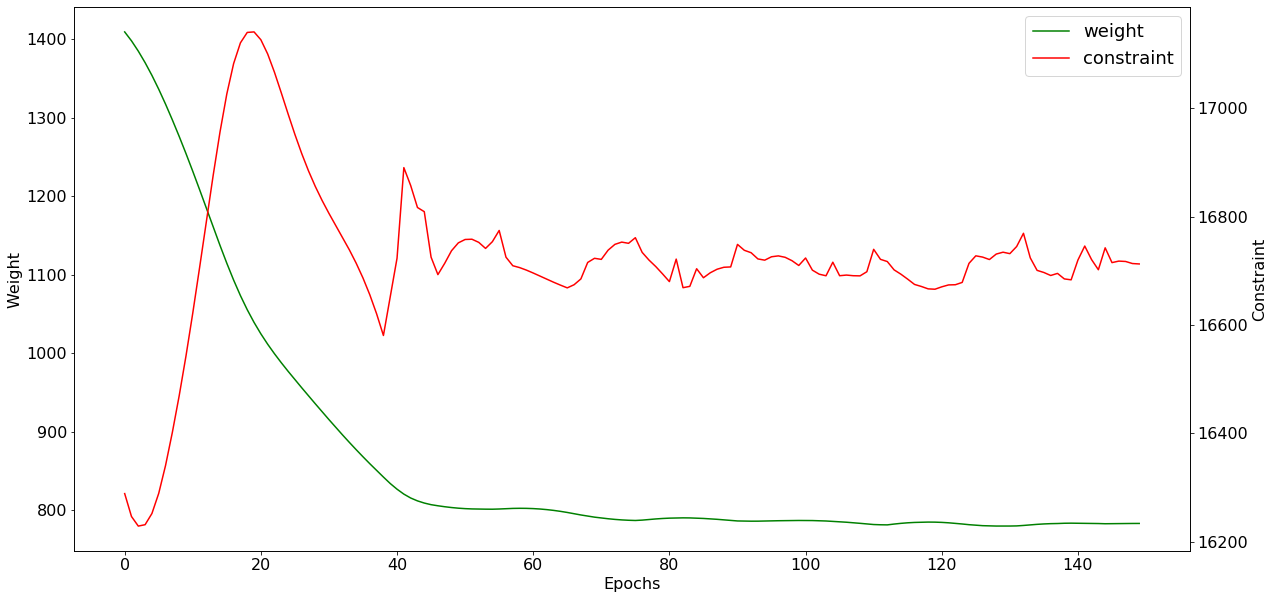

In [18]:
V = visual.Visual(data_path="data", plot=False)

V.constraint_weigth_plot()

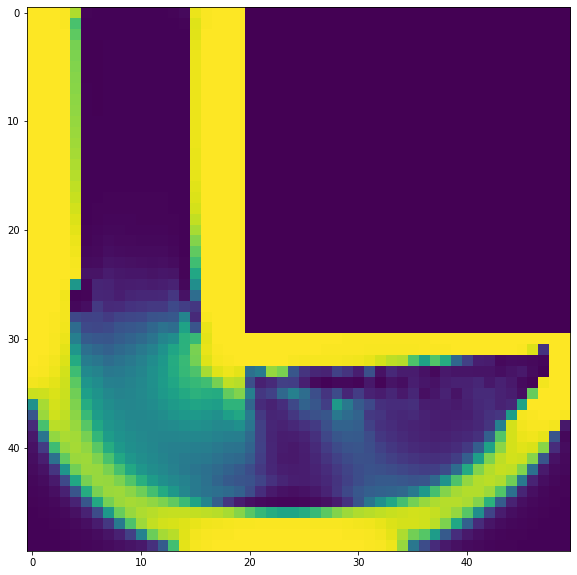

In [19]:
design_animation = V.animate(problem_size, mode="design")
HTML(design_animation.to_html5_video())